# Python PDE examples for 361  

In [32]:
from fipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import errno
#from matplotlib.contour import ContourSet
#import matplotlib.cm as cm

In [33]:
%matplotlib inline

In [34]:
%config InlineBackend.close_figures = False #so inline mode doesn't auto close figures at end of cell - for SAVING

#### 1D

In [55]:
nx = 20
dx = 0.05
L = dx * nx
mesh = Grid1D(dx=dx, nx=nx)

In [56]:
phi_dir = CellVariable(name = "Temperature (2x Dirichlet)", mesh = mesh, value = 0.)
phi_neu = CellVariable(name = "Temperature (1x Dirichlet, 1x Neumann)", mesh = mesh, value = 0.)

In [57]:
D = 1.
eq_dir = TransientTerm(var=phi_dir) == DiffusionTerm(var=phi_dir,coeff=D)
eq_neu = TransientTerm(var=phi_neu) == DiffusionTerm(var=phi_neu,coeff=D)

In [58]:
valueLeft = 1
#valueRight = 0

In [59]:
phi_dir.constrain(valueLeft, mesh.facesLeft)
phi_dir.constrain(valueRight, mesh.facesRight)

phi_neu.constrain(valueLeft, mesh.facesLeft)

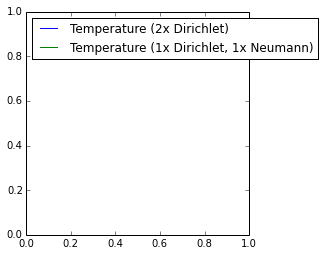

In [60]:
#if __name__ == '__main__':
viewer = Viewer(vars=(phi_dir,phi_neu), datamin=0., datamax=1.)
viewer.plot()

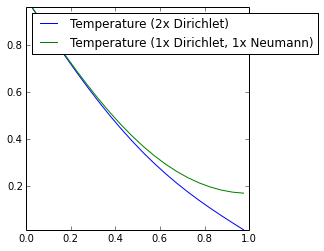

In [70]:
timeStepDuration = 10*0.9*dx**2/(2*D)
steps = 5#10
for step in range(steps):
    eq_dir.solve(var=phi_dir,dt=timeStepDuration)
    eq_neu.solve(var=phi_neu,dt=timeStepDuration)
     #if __name__ == '__main__':
#temp_t0 = np.copy(numerix.reshape(phi,(20,20)))
viewer = Viewer(vars=(phi_dir,phi_neu))#, datamin=0., datamax=1.)
viewer.plot()

phi = CellVariable(name = "Temperature", mesh = mesh, value = 1.0)
#phi.constrain(0.2, mesh.facesLeft)
#phi.constrain(0.1, mesh.facesLeft)

DiffusionTerm(coeff=D).solve(var=phi)
viewer = Viewer(vars=phi, datamin=0., datamax=1.01,title="Temperature" )
viewer.plot()

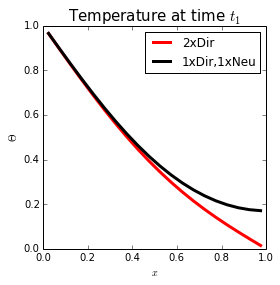

In [111]:
temp_1D_dir = np.copy(phi_dir.value)
temp_1D_neu = np.copy(phi_neu.value)
x = np.copy(mesh.cellCenters.value[0])

plt.close('all')

plt.figure('fig_temp_1D',figsize=(4,4))
plt.ylabel('$\Theta$',size=10)
plt.xlabel('$x$',size=10)
plt.ylim(0,1.)
plt.xlim(0,1.)
plt.title('Temperature at time $t_1$',size=15)

plt.plot(x,temp_1D_dir,'r-',linewidth=3)
plt.plot(x,temp_1D_neu,'k-',linewidth=3)
plt.legend(['2xDir','1xDir,1xNeu'])
#plt.colorbar(format='%1.1f')
plt.show()

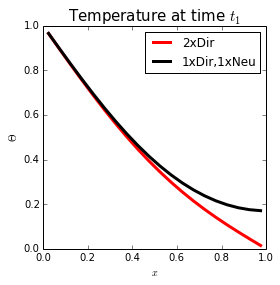

In [112]:
save_path= '../../figures/'
#save_path= output_path+sample_type+'/'
save_fig= True
if save_fig:
    try:
        os.makedirs(save_path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(save_path):
            pass
        else: raise
    plt.figure('fig_temp_1D').savefig(save_path+'fig_temp_1D.pdf')
    #plt.figure('fig_temp_1D').savefig(save_path+'fig_temp_1D.jpg')
plt.figure('fig_temp_1D').show()

#### 2D

In [19]:
nx = 20
ny = nx
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

In [20]:
phi = CellVariable(name = "Temperature", mesh = mesh, value = 0.)

In [21]:
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

In [25]:
valueTopLeft = 0
valueBottomRight = 1

In [28]:
X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2)) | (mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2)) | (mesh.facesBottom & (X > L / 2)))

In [29]:
phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

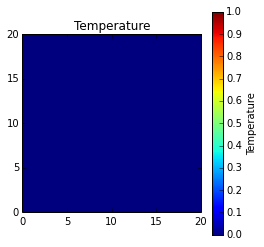

In [30]:
#if __name__ == '__main__':
viewer = Viewer(vars=phi, datamin=0., datamax=1.)
viewer.plot()

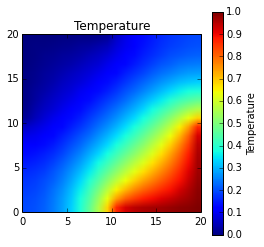

In [31]:
timeStepDuration = 10*0.9*dx**2/(2*D)
steps = 10
for step in range(steps):
    eq.solve(var=phi,dt=timeStepDuration)
     #if __name__ == '__main__':
temp_t0 = np.copy(numerix.reshape(phi,(20,20)))
viewer = Viewer(vars=phi, datamin=0., datamax=1.)
viewer.plot()

In [27]:
print numerix.allclose(phi(((L,), (0,))), valueBottomRight, atol = 1e-2)

True


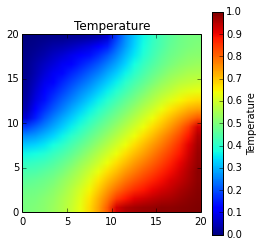

In [28]:
#Steady state?
DiffusionTerm().solve(var=phi)
viewer = Viewer(vars=phi, datamin=0., datamax=1.,title="Temperature" )
viewer.plot()

In [29]:
print numerix.allclose(phi(((L,), (0,))), valueBottomRight, atol = 1e-2)

True


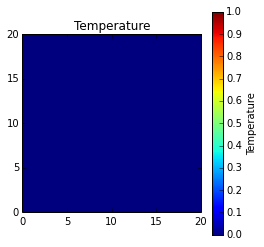

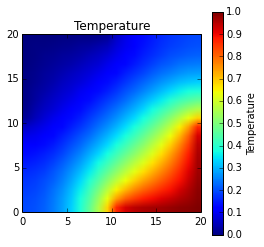

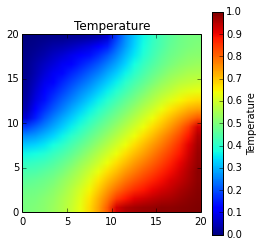

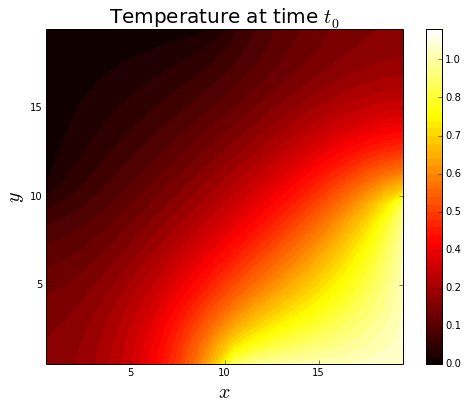

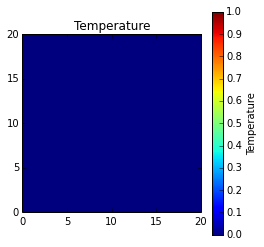

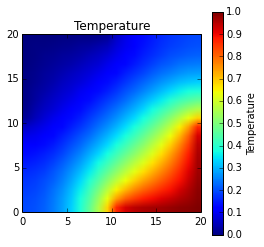

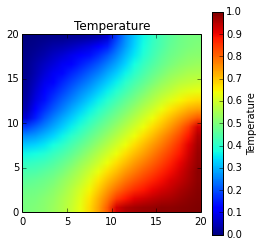

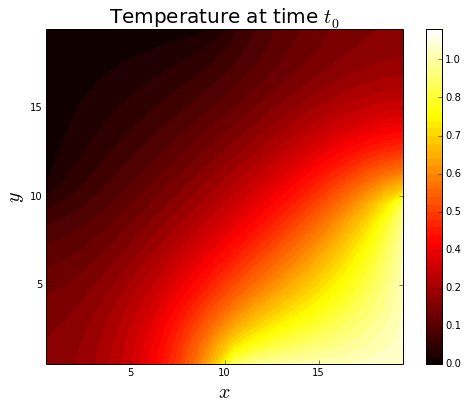

In [30]:
cmap = mpl.cm.hot
levels= np.linspace(0,1.05,45)
x = mesh.x()[0:20]
y = mesh.x()[0:20] #Note!
#temp_t1 = numerix.reshape(phi,(20,20))
plt.figure(figsize=(8,6))
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.title('Temperature at time $t_0$',size=20)
plt.contourf(x,y,temp_t0,cmap=cmap,shade=True,levels=levels)
plt.colorbar(format='%1.1f')
plt.show()

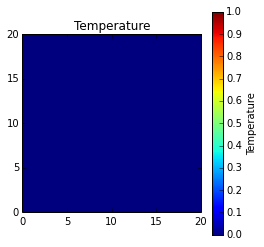

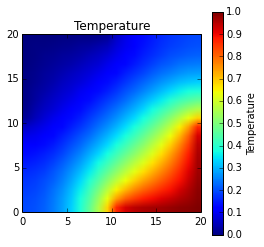

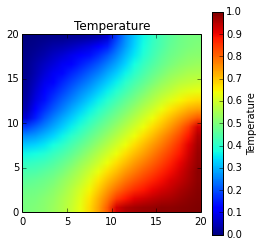

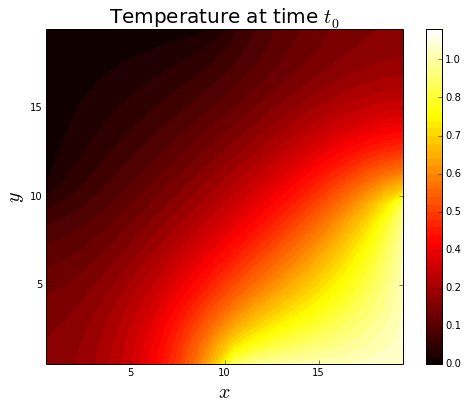

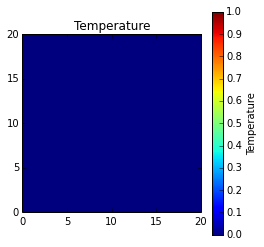

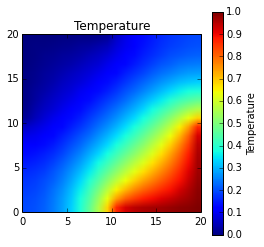

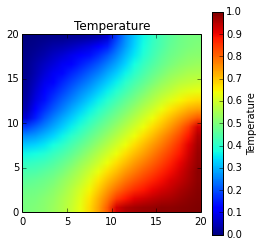

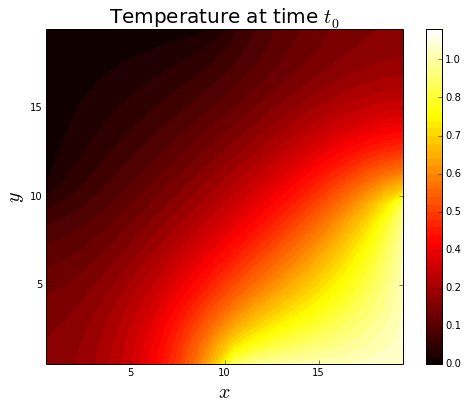

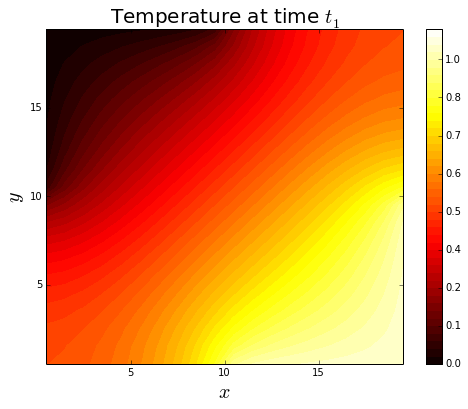

In [31]:
#cmap = mpl.cm.jet
cmap = mpl.cm.hot
levels= np.linspace(0,1.05,45)
x = mesh.x()[0:20]
y = mesh.x()[0:20] #Note!
temp_t1 = numerix.reshape(phi,(20,20))
plt.figure(figsize=(8,6))
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.title('Temperature at time $t_1$',size=20)
plt.contourf(x,y,temp_t1,cmap=cmap,shade=True,levels=levels)
plt.colorbar(format='%1.1f')
plt.show()

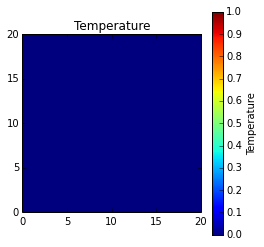

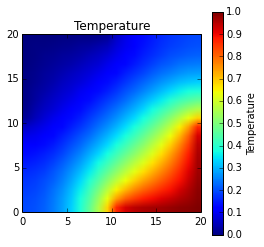

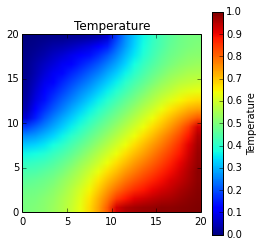

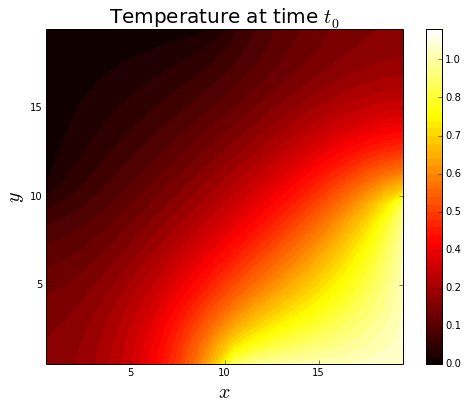

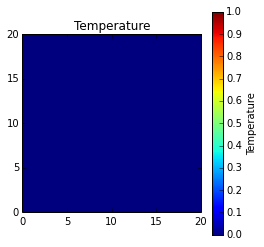

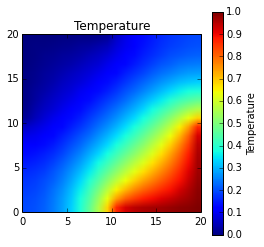

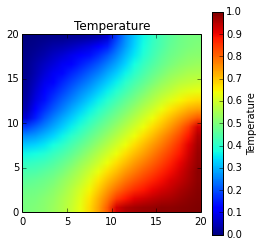

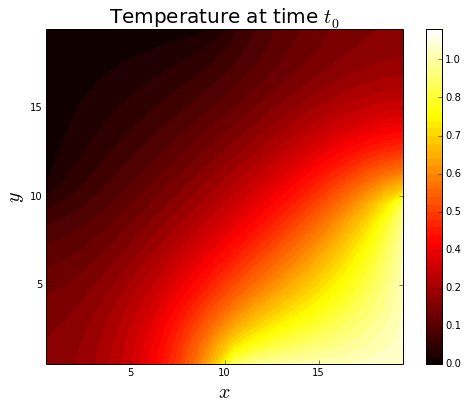

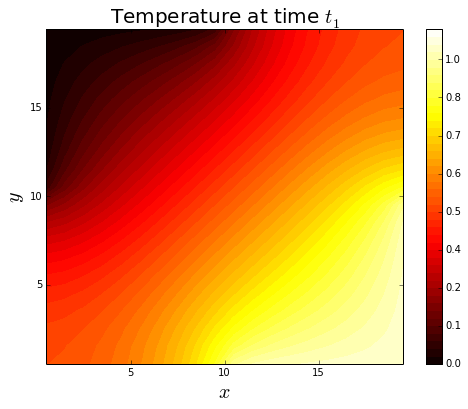

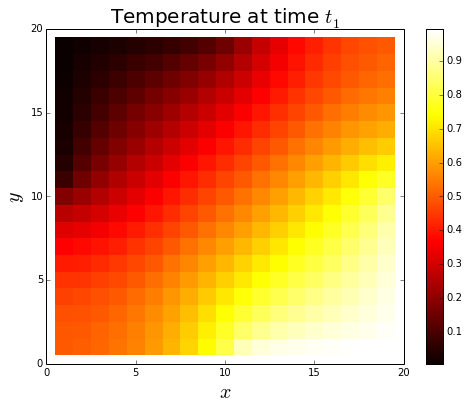

In [32]:
#cmap = mpl.cm.jet
cmap = mpl.cm.hot
levels= np.linspace(0,1.05,45)
x = mesh.x()[0:20]
y = mesh.x()[0:20] #Note!
temp_t1 = numerix.reshape(phi,(20,20))
plt.figure(figsize=(8,6))
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.title('Temperature at time $t_1$',size=20)
plt.pcolor(x,y,temp_t1,cmap=cmap)
plt.colorbar(format='%1.1f')
plt.show()


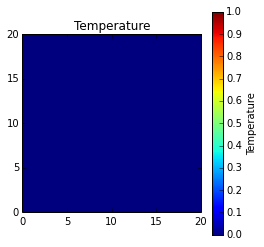

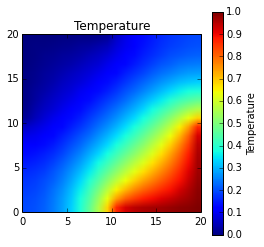

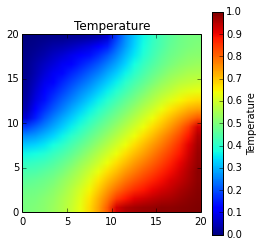

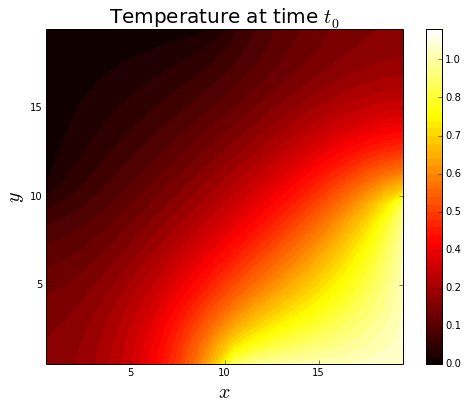

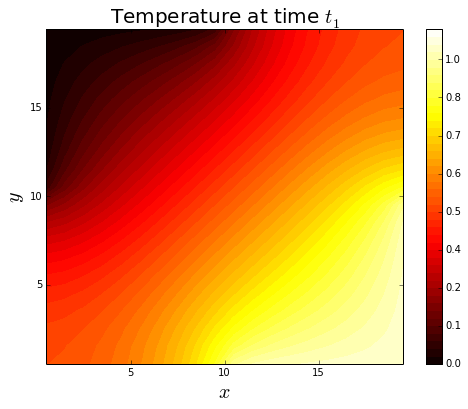

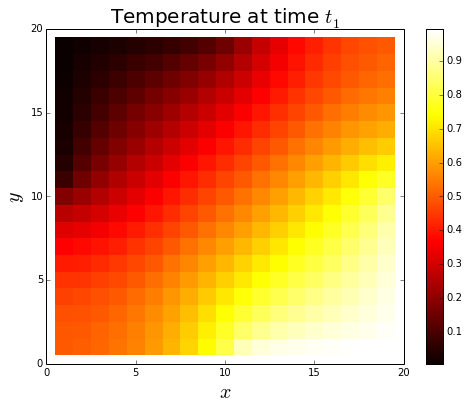

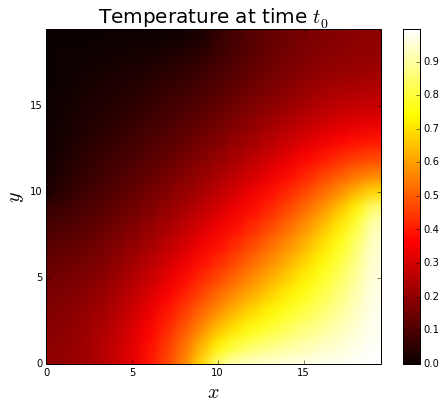

In [19]:
plt.figure('fig_temp_t0',figsize=(8,6))
#plt.figure(figsize=(8,6))
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.ylim(0,19.5)
plt.xlim(0,19.5)
plt.title('Temperature at time $t_0$',size=20)
plt.imshow(temp_t0,interpolation='gaussian',cmap = mpl.cm.hot)
plt.colorbar(format='%1.1f')
plt.show()

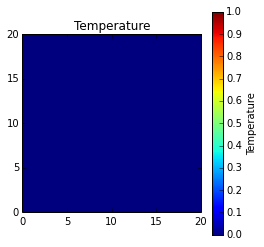

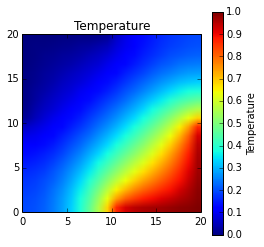

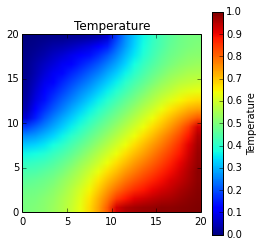

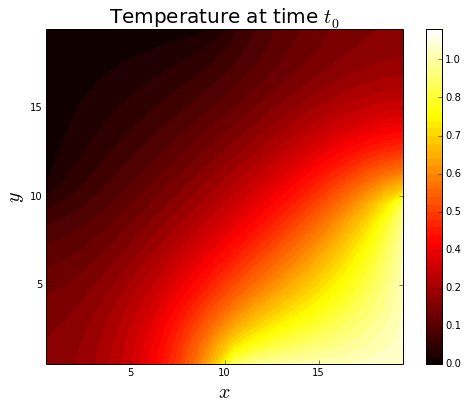

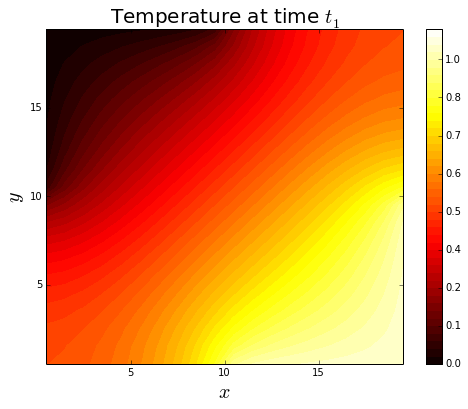

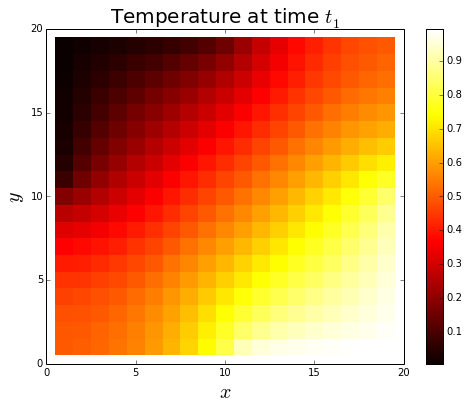

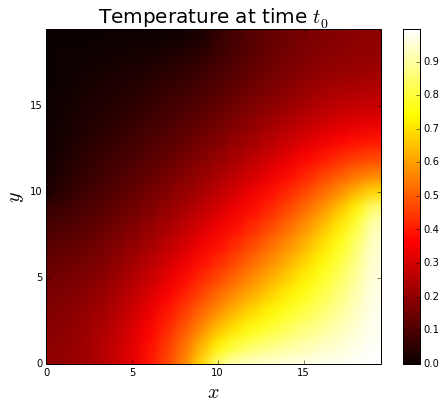

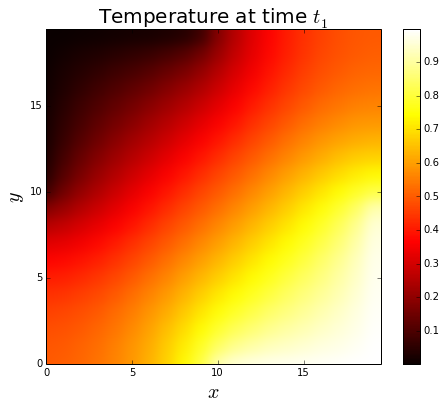

In [20]:
plt.figure('fig_temp_t1',figsize=(8,6))
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.ylim(0,19.5)
plt.xlim(0,19.5)
plt.title('Temperature at time $t_1$',size=20)
plt.imshow(temp_t1,interpolation='gaussian',cmap = mpl.cm.hot)
plt.colorbar(format='%1.1f')
plt.show()

/Users/user/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


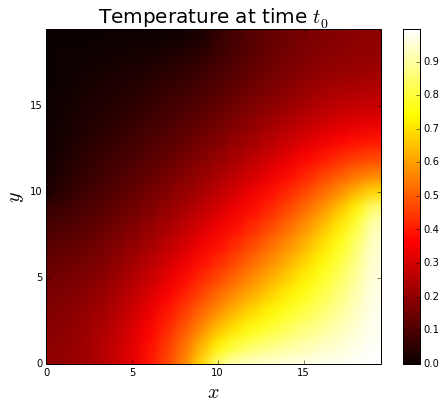

In [21]:
save_path= '../../figures/'
#save_path= output_path+sample_type+'/'
save_fig= True
if save_fig:
    try:
        os.makedirs(save_path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(save_path):
            pass
        else: raise
    plt.figure('fig_temp_t0').savefig(save_path+'fig_temp_t0.pdf')
plt.figure('fig_temp_t0').show()

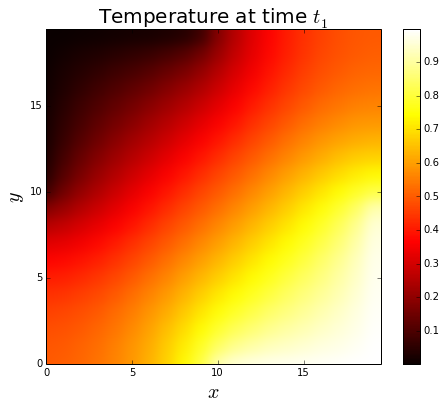

In [22]:
save_path= '../../figures/'
#save_path= output_path+sample_type+'/'
save_fig= True
if save_fig:
    try:
        os.makedirs(save_path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(save_path):
            pass
        else: raise
    plt.figure('fig_temp_t1').savefig(save_path+'fig_temp_t1.pdf')
plt.figure('fig_temp_t1').show()